In [1]:
##script OK
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from io import StringIO
import os
from os.path import basename, splitext
#from pathlib import Path
import seaborn as sns
import numpy as np

In [ ]:
#récupérer la matrice de confusion pour chaque texte
# aller chercher les valeurs pour chaque texte
# ploter : point : texte avec valeurs accuracy 
# x = lieu
# y = date

In [2]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('## '):
        yield sec if sec.startswith('## ') else '## '+sec

In [3]:
#fonction de production des donnnées sous forme de tableau propre
def prod_DF(texteT,titre):
    dfGlobalDataLoc = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','label'])
    for i,sec in enumerate(get_sections(texteT)):
        if i == 0:
            pass
        else:
            print(i,sec)
            sec2 = re.sub('##.*', '', sec)
            currentVal = re.search('##\s*(\w*)\n', sec).group(1)
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            df.insert(4,"deaf",titre,True)
            df.insert(5,"label",currentVal,True)
            dfGlobalDataLoc = dfGlobalDataLoc.append(df)
    print(dfGlobalDataLoc)        
    return dfGlobalDataLoc

In [4]:
#df : bien vider avant boucle
dfGlobalData = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','label'])

In [6]:
#boucle sur directory avec application de la fonction et production d'un tableau avec les data
#basepath = 'tableursParVal/deaf/'
###variation pour data tidy/tidyLex
basepath = 'tableursParVal/deaf/tidyLex/'
####
for entry in os.listdir(basepath):
    #if entry.endswith('Confusion.md'):
    ###variation pour data tidy
    if entry.endswith('ConfusionTidyLex.md'):
    ####    
        fullPath = basepath + entry
        with open(fullPath, 'r') as f:
            texteT = f.read()
            print(f)
            t = splitext(basename(fullPath))[0]
            #titre = t.partition(".tsv")[0]
            ###variation pour data tidy
            titre = t.partition("TidyLex.tsv")[0]
            ###
            dfGlobalDataLoc = prod_DF(texteT,titre)
            dfGlobalData = dfGlobalData.append(dfGlobalDataLoc)

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/IpHTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8843   | 0.7257    | 0.7257 | 268     |
| known-tokens     | 0.8843   | 0.7257    | 0.7257 | 268     |
| ambiguous-tokens | 0.7568   | 0.5536    | 0.5595 | 37      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 3       |


                 accuracy precision  recall support  label deaf
all                0.8843    0.7257  0.7257     268  lemma  IpH
known-tokens       0.8843    0.7257  0.7257     268  lemma  IpH
ambiguous-tokens   0.7568    0.5536  0.5595      37  lemma  IpH
unknown-targets       0.0       0.0     0.0       3  lemma  IpH
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/EvEnfBTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy |

                 accuracy precision  recall support  label       deaf
all                0.8375    0.6837  0.6905      80  lemma  BenTroieC
known-tokens       0.8375    0.6837  0.6905      80  lemma  BenTroieC
ambiguous-tokens   0.6471    0.3594   0.375      17  lemma  BenTroieC
unknown-targets       1.0       1.0     1.0       1  lemma  BenTroieC
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MaccabESTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7949   | 0.4921    | 0.4426 | 39      |
| known-tokens     | 0.7949   | 0.4921    | 0.4426 | 39      |
| ambiguous-tokens | 0.8      | 0.75      | 0.6667 | 5       |


                 accuracy precision  recall support label      deaf
all                0.7949    0.4921  0.4426      39   POS  MaccabES
known-tokens       0.7949    0.4921  0.4426      39   POS  Macc

                 accuracy precision  recall support  label          deaf
all                0.7959    0.6732  0.6669     436  lemma  BestPierre1M
known-tokens       0.7959    0.6732  0.6669     436  lemma  BestPierre1M
ambiguous-tokens   0.4528    0.3982  0.3752      53  lemma  BestPierre1M
unknown-targets    0.0882    0.0811  0.0811      34  lemma  BestPierre1M
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ElesB_TTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6596   | 0.4856    | 0.5    | 47      |
| known-tokens     | 0.6596   | 0.4856    | 0.5    | 47      |
| ambiguous-tokens | 0.4286   | 0.3       | 0.3    | 7       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 8       |


                 accuracy precision recall support  label     deaf
all                0.6596    0.4856    0.5      47 

                 accuracy precision  recall support label     deaf
all                0.7432    0.5016  0.5375      74   POS  PsLorrA
known-tokens       0.7432    0.5016  0.5375      74   POS  PsLorrA
ambiguous-tokens      0.5       0.4  0.2667       8   POS  PsLorrA
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MerlinPTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8831   | 0.7846    | 0.7761 | 77      |
| known-tokens     | 0.8831   | 0.7846    | 0.7761 | 77      |
| ambiguous-tokens | 0.5      | 0.4333    | 0.4133 | 14      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision  recall support  label     deaf
all                0.8831    0.7846  0.7761      77  lemma  MerlinP
known-tokens       0.8831    0.7846  0.7761      77  lemma  MerlinP
ambiguous-t

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RolSTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6535   | 0.2473    | 0.2635 | 101     |
| known-tokens     | 0.6535   | 0.2473    | 0.2635 | 101     |
| ambiguous-tokens | 0.4      | 0.381     | 0.3333 | 10      |


                 accuracy precision  recall support label  deaf
all                0.6535    0.2473  0.2635     101   POS  RolS
known-tokens       0.6535    0.2473  0.2635     101   POS  RolS
ambiguous-tokens      0.4     0.381  0.3333      10   POS  RolS
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/PercLo_HTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8684   | 0

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SermMaurPBTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8732   | 0.7172    | 0.7238 | 142     |
| known-tokens     | 0.8732   | 0.7172    | 0.7238 | 142     |
| ambiguous-tokens | 0.7826   | 0.6       | 0.6571 | 23      |
| unknown-targets  | 0.125    | 0.0769    | 0.0769 | 8       |


                 accuracy precision  recall support  label        deaf
all                0.8732    0.7172  0.7238     142  lemma  SermMaurPB
known-tokens       0.8732    0.7172  0.7238     142  lemma  SermMaurPB
ambiguous-tokens   0.7826       0.6  0.6571      23  lemma  SermMaurPB
unknown-targets     0.125    0.0769  0.0769       8  lemma  SermMaurPB
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MirNDChartrKTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8

                 accuracy precision  recall support  label           deaf
all                0.8657    0.7628  0.7473      67  lemma  ChastVergiS_G
known-tokens       0.8657    0.7628  0.7473      67  lemma  ChastVergiS_G
ambiguous-tokens   0.6111    0.3111  0.2778      18  lemma  ChastVergiS_G
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/BesantRTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7059   | 0.5128    | 0.577  | 34      |
| known-tokens     | 0.7059   | 0.5128    | 0.577  | 34      |
| ambiguous-tokens | 0.25     | 0.25      | 0.125  | 4       |


                 accuracy precision recall support label     deaf
all                0.7059    0.5128  0.577      34   POS  BesantR
known-tokens       0.7059    0.5128  0.577      34   POS  BesantR
ambiguous-tokens     0.25      0.25  0.125       4   POS

                 accuracy precision  recall support  label        deaf
all                0.8111     0.636  0.6293     270  lemma  BestGuillR
known-tokens       0.8111     0.636  0.6293     270  lemma  BestGuillR
ambiguous-tokens   0.4419    0.2174  0.2174      43  lemma  BestGuillR
unknown-targets    0.1053    0.0625  0.0625      19  lemma  BestGuillR
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AthisHTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6226   | 0.2744    | 0.3323 | 106     |
| known-tokens     | 0.6226   | 0.2744    | 0.3323 | 106     |
| ambiguous-tokens | 0.4091   | 0.237     | 0.2444 | 22      |


                 accuracy precision  recall support label    deaf
all                0.6226    0.2744  0.3323     106   POS  AthisH
known-tokens       0.6226    0.2744  0.3323     106   POS  Athis

                 accuracy precision  recall support  label      deaf
all                0.8312    0.7586  0.7328      77  lemma  PercLo_L
known-tokens       0.8312    0.7586  0.7328      77  lemma  PercLo_L
ambiguous-tokens   0.5333       0.5     0.4      15  lemma  PercLo_L
unknown-targets       0.5    0.3333  0.3333       2  lemma  PercLo_L
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SRemiBTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6931   | 0.384     | 0.3887 | 101     |
| known-tokens     | 0.6931   | 0.384     | 0.3887 | 101     |
| ambiguous-tokens | 0.8125   | 0.8333    | 0.7619 | 16      |


                 accuracy precision  recall support label    deaf
all                0.6931     0.384  0.3887     101   POS  SRemiB
known-tokens       0.6931     0.384  0.3887     101   POS  SRemiB
ambiguou

                 accuracy precision  recall support label         deaf
all                0.7059    0.3951  0.4049      68   POS  PeanGatS1_1
known-tokens       0.7059    0.3951  0.4049      68   POS  PeanGatS1_1
ambiguous-tokens   0.4286    0.3333  0.1389       7   POS  PeanGatS1_1
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/BestGervMTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7143   | 0.3704    | 0.3556 | 42      |
| known-tokens     | 0.7143   | 0.3704    | 0.3556 | 42      |
| ambiguous-tokens | 0.6      | 0.5556    | 0.5333 | 10      |


                 accuracy precision  recall support label       deaf
all                0.7143    0.3704  0.3556      42   POS  BestGervM
known-tokens       0.7143    0.3704  0.3556      42   POS  BestGervM
ambiguous-tokens      0.6    0.5556  0.5333      10   POS

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RenN_KTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7857   | 0.6087    | 0.6087 | 42      |
| known-tokens     | 0.7857   | 0.6087    | 0.6087 | 42      |
| ambiguous-tokens | 0.6667   | 0.3333    | 0.3333 | 9       |
| unknown-targets  | 0.2      | 0.1111    | 0.1111 | 5       |


                 accuracy precision  recall support  label    deaf
all                0.7857    0.6087  0.6087      42  lemma  RenN_K
known-tokens       0.7857    0.6087  0.6087      42  lemma  RenN_K
ambiguous-tokens   0.6667    0.3333  0.3333       9  lemma  RenN_K
unknown-targets       0.2    0.1111  0.1111       5  lemma  RenN_K
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SEust2PTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|           

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ComtePoitMTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8085   | 0.65      | 0.66   | 47      |
| known-tokens     | 0.8085   | 0.65      | 0.66   | 47      |
| ambiguous-tokens | 0.8333   | 0.6667    | 0.6667 | 6       |


                 accuracy precision  recall support  label        deaf
all                0.8085      0.65    0.66      47  lemma  ComtePoitM
known-tokens       0.8085      0.65    0.66      47  lemma  ComtePoitM
ambiguous-tokens   0.8333    0.6667  0.6667       6  lemma  ComtePoitM
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ContPerc2RTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|--------

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/FetRomF1TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8548   | 0.717     | 0.7075 | 62      |
| known-tokens     | 0.8548   | 0.717     | 0.7075 | 62      |
| ambiguous-tokens | 0.8571   | 0.6667    | 0.6667 | 7       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support  label      deaf
all                0.8548     0.717  0.7075      62  lemma  FetRomF1
known-tokens       0.8548     0.717  0.7075      62  lemma  FetRomF1
ambiguous-tokens   0.8571    0.6667  0.6667       7  lemma  FetRomF1
unknown-targets       0.0       0.0     0.0       5  lemma  FetRomF1
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_ITidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## l

                 accuracy precision  recall support  label                deaf
all                0.7619     0.561  0.5447      42  lemma  NoomenFabl_transB*
known-tokens       0.7619     0.561  0.5447      42  lemma  NoomenFabl_transB*
ambiguous-tokens      0.7       0.4     0.4      10  lemma  NoomenFabl_transB*
unknown-targets       0.0       0.0     0.0       3  lemma  NoomenFabl_transB*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_GTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6269   | 0.3446    | 0.3841 | 67      |
| known-tokens     | 0.6269   | 0.3446    | 0.3841 | 67      |
| ambiguous-tokens | 0.4444   | 0.3688    | 0.3563 | 18      |


                 accuracy precision  recall support label           deaf
all                0.6269    0.3446  0.3841      67   POS  ChastVergiS_G
kno

                 accuracy precision recall support  label           deaf
all                0.9574     0.875  0.875      47  lemma  ChastVergiS_K
known-tokens       0.9574     0.875  0.875      47  lemma  ChastVergiS_K
ambiguous-tokens      0.8       0.6    0.6      10  lemma  ChastVergiS_K
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieEquitS_HTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6977   | 0.3008    | 0.2988 | 43      |
| known-tokens     | 0.6977   | 0.3008    | 0.2988 | 43      |
| ambiguous-tokens | 0.6154   | 0.64      | 0.6889 | 13      |


                 accuracy precision  recall support label           deaf
all                0.6977    0.3008  0.2988      43   POS  MarieEquitS_H
known-tokens       0.6977    0.3008  0.2988      43   POS  MarieEquitS_H
ambiguous-tokens   0.6154      0.

                 accuracy precision  recall support  label      deaf
all                0.8714    0.7212  0.7184      70  lemma  SGregA1S
known-tokens       0.8714    0.7212  0.7184      70  lemma  SGregA1S
ambiguous-tokens    0.625      0.25    0.25       8  lemma  SGregA1S
unknown-targets    0.3333      0.25    0.25       3  lemma  SGregA1S
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CassidPTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7606   | 0.4459    | 0.4147 | 71      |
| known-tokens     | 0.7606   | 0.4459    | 0.4147 | 71      |
| ambiguous-tokens | 0.6111   | 0.5833    | 0.525  | 18      |


                 accuracy precision  recall support label     deaf
all                0.7606    0.4459  0.4147      71   POS  CassidP
known-tokens       0.7606    0.4459  0.4147      71   POS  CassidP
ambi

                 accuracy precision  recall support  label    deaf
all                0.8205    0.6111  0.6111      39  lemma  ModvB2
known-tokens       0.8205    0.6111  0.6111      39  lemma  ModvB2
ambiguous-tokens      0.5    0.3333  0.3333       6  lemma  ModvB2
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AdHaleRobS*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8438   | 0.6786    | 0.6786 | 32      |
| known-tokens     | 0.8438   | 0.6786    | 0.6786 | 32      |
| ambiguous-tokens | 0.3333   | 0.2       | 0.2    | 3       |
| unknown-targets  | 0.5      | 0.3333    | 0.3333 | 2       |


                 accuracy precision  recall support  label         deaf
all                0.8438    0.6786  0.6786      32  lemma  AdHaleRobS*
known-tokens       0.8438    0.6786  0.6786      32  lemma  AdHaleR

                 accuracy precision  recall support label   deaf
all                0.7244    0.3811  0.3865     127   POS  AdamA
known-tokens       0.7244    0.3811  0.3865     127   POS  AdamA
ambiguous-tokens   0.6842    0.5714  0.5367      19   POS  AdamA
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ElesB_BTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7333   | 0.5       | 0.4224 | 15      |
| known-tokens     | 0.7333   | 0.5       | 0.4224 | 15      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 1       |


                 accuracy precision  recall support label     deaf
all                0.7333       0.5  0.4224      15   POS  ElesB_B
known-tokens       0.7333       0.5  0.4224      15   POS  ElesB_B
ambiguous-tokens      1.0       1.0     1.0       1   POS  ElesB_B
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AdHaleRobS*TidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7188   | 0.4167    | 0.45   | 32      |
| known-tokens     | 0.7188   | 0.4167    | 0.45   | 32      |
| ambiguous-tokens | 0.3333   | 0.25      | 0.25   | 3       |


                 accuracy precision recall support label         deaf
all                0.7188    0.4167   0.45      32   POS  AdHaleRobS*
known-tokens       0.7188    0.4167   0.45      32   POS  AdHaleRobS*
ambiguous-tokens   0.3333      0.25   0.25       3   POS  AdHaleRobS*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CharroiSch_C*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|--------

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/LancPrM_STidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8991   | 0.8472    | 0.8433 | 109     |
| known-tokens     | 0.8991   | 0.8472    | 0.8433 | 109     |
| ambiguous-tokens | 0.619    | 0.6       | 0.6    | 21      |


                 accuracy precision  recall support  label       deaf
all                0.8991    0.8472  0.8433     109  lemma  LancPrM_S
known-tokens       0.8991    0.8472  0.8433     109  lemma  LancPrM_S
ambiguous-tokens    0.619       0.6     0.6      21  lemma  LancPrM_S
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieFab_LTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------

In [7]:
dfGlobalData
dfGlobalAll = dfGlobalData.loc['all']

#sélection des colonnes pour la modélisation
dfGA= dfGlobalAll[['accuracy','support','label','deaf']]
dfGA

,accuracy,support,label,deaf
all,0.8843,268,lemma,IpH
all,0.9474,38,lemma,EvEnfB
all,0.6364,44,POS,MarieDousAm_H
all,0.8333,42,lemma,RenN_A
all,0.7857,42,lemma,MarieFab_B
...,...,...,...,...
all,0.8421,38,lemma,SSilvCroixP
all,0.8991,109,lemma,LancPrM_S
all,0.7164,67,lemma,MarieFab_L
all,0.7742,31,lemma,AngVieGregM


In [8]:
dfMD = pd.read_csv('../Nouveau_corpus/metadataRevuSansSpace_Genres.tsv', delimiter='\t')
dfMD

,deaf,titreDees,genre,vers,lieuComposition,dateComposition,lieuManuscrit,dateManuscrit,qualite,lieuCompositionType,dateCompositionType,lieuManuscritType,dateManuscritType,genreType,rmques
0,OrsonP,"Orson de Beauvais, v. 1-2005",chanson de geste en alexandrins,oui,pic. mérid.,1225ca,lorr.,1290pm10,ms,pic,1emxiiie,lorr,2emxiiie,chgeste,-
1,RenN_H,"Le roman de Renart, branche VI, ms. H",nil,oui,nil,1188pm13,pic.,1290pm10,ms1,nil,2emxiie,pic,2emxiiie,narrbref,-
2,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-
3,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-
4,RenBeaujBelW2,"[PVR] Le bel inconnu, de Renaut de Beaujeu v.1...",conte en octosyllabes,oui,est,1200ca,hain.,1283pm17,ms2,bourgfrc,1emxiiie,pic,2emxiiie,narrbref,traits frc brg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-
289,MarieFab_Y,nil,fable,oui,Nord-Ouest,1180ca,nil,1225pm25,ms,ouest,2emxiie,nil,1emxiiie,narrbref,-
290,ChastVergiS_K,"La chastelaine de Vergi, ms. K",conte courtois en octosyllabes,oui,norm.,1240ca,pic.,1350pm10,ms1,ouest,1emxiiie,pic,mxive,narrbref,-
291,MarieLaisE2,"Eliduc, ms. H",lais,oui,Nord-ouest,1165ca,agn.,1275pm25,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-


In [9]:
#on arrange nos données
dfMD = dfMD.replace(to_replace='Aiol1/2N', value='Aiol1_2N')
dfMD = dfMD.replace(to_replace='YvainLo*;PercLo*', value='YvainLo*_PercLo*')
#dfMD = dfMD.replace(to_replace='PenitAdam1/2Q', value='PenitAdam1_2Q')


In [56]:
# on merge
dfFull = pd.merge(dfMD,dfGA, on='deaf')
dfFull


,deaf,titreDees,genre,vers,lieuComposition,dateComposition,lieuManuscrit,dateManuscrit,qualite,lieuCompositionType,dateCompositionType,lieuManuscritType,dateManuscritType,genreType,rmques,accuracy,support,label
0,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.6806,72,POS
1,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.9028,72,lemma
2,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.8438,32,lemma
3,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.7188,32,POS
4,PercLo_U,"Le Perceval de Chrétien de Troyes, ms. U, v. 1...",roman arthurien,oui,champ. mérid.,1180ca,Paris,1330ca,ms1,champ,2emxiie,idf,1emxive,roman,-,0.7317,82,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CharroiSch_D*,"Le charroi de Nimes, ms. D",nil,oui,nil,1150pm20,lorr. mérid.,1275pm25,ms1,nil,mxiie,lorr,2emxiiie,chgeste,-,0.6512,43,POS
296,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.7857,42,lemma
297,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.6905,42,POS
298,ChastVergiS_K,"La chastelaine de Vergi, ms. K",conte courtois en octosyllabes,oui,norm.,1240ca,pic.,1350pm10,ms1,ouest,1emxiiie,pic,mxive,narrbref,-,0.7021,47,POS


In [63]:
#sélection label : si besoin
dfFull = dfFull[dfFull["label"]== "lemma"]
dfFull

,deaf,titreDees,genre,vers,lieuComposition,dateComposition,lieuManuscrit,dateManuscrit,qualite,lieuCompositionType,dateCompositionType,lieuManuscritType,dateManuscritType,genreType,rmques,accuracy,support,label
1,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.9028,72,lemma
2,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.8438,32,lemma
5,PercLo_U,"Le Perceval de Chrétien de Troyes, ms. U, v. 1...",roman arthurien,oui,champ. mérid.,1180ca,Paris,1330ca,ms1,champ,2emxiie,idf,1emxive,roman,-,0.9390,82,lemma
7,FetRomF1,"Li fet des Romains, p. 5-31, ms. V",roman antique (basé sur Lucain),non,frc.,1213ca,bourg.,1290pm10,cr1,bourgfrc,1emxiiie,bourgfrc,2emxiiie,hist,-,0.8548,62,lemma
8,SEust2P,"La vie de Saint Eustache, ms. M",vie de saint en octosyllabes,oui,norm.,1210pm10,norm.,1250ca,ms2,ouest,1emxiiie,ouest,mxiiie,hagio,-,0.7500,72,lemma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,BenTroieC,"[PVR] Le roman de Troie par B. de ste-Maure, v...",roman épique,oui,poit.,1170ca,agn.,1210pm10,cr3,centre,2emxiie,agn,1emxiiie,hist,-,0.8375,80,lemma
293,RenNouvR,"Renart le Nouvel par Jacquemart Gielee, v. 1-3026",roman en vers,oui,Lille,1290ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,roman,-,0.9091,33,lemma
294,CharroiSch_D*,"Le charroi de Nimes, ms. D",nil,oui,nil,1150pm20,lorr. mérid.,1275pm25,ms1,nil,mxiie,lorr,2emxiiie,chgeste,-,0.7209,43,lemma
296,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.7857,42,lemma


In [64]:
dfFull['accuracy'] = dfFull['accuracy'].astype(float) 
#dfFull['accuracy'].round(decimals = 3)

In [65]:
cat_typeCompo = pd.CategoricalDtype(categories = ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","2emxive"], ordered=True)
cat_typeMs = pd.CategoricalDtype(categories = ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","2emxive"], ordered=True)

dfFull['dateCompositionType'] = dfFull['dateCompositionType'].astype(cat_typeCompo)
dfFull['dateManuscritType'] = dfFull['dateManuscritType'].astype(cat_typeMs)
#dfFullOrder = dfFull.sort_values("dateComposition")
#dfFull.sort_values(by=['dateComposition'], key=lambda x: x.map(custom_dict))

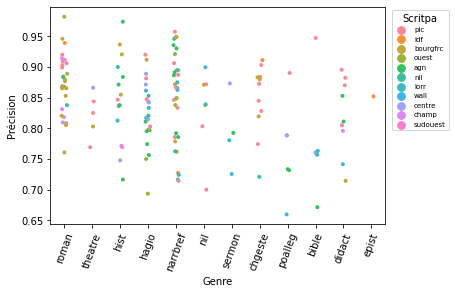

In [156]:
### scatterplot
plt.xticks(rotation=70)

gfg = sns.stripplot(data = dfFull, x="genreType", y="accuracy", hue="lieuManuscritType", jitter=True, size=4)
gfg.legend(fontsize=7,bbox_to_anchor= (1.2,1),title="Scritpa")
plt.xlabel('Genre')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/scatterplots/tidyLex/LemmaAccGenreLieuMS.png', dpi=300, transparent=False,bbox_inches='tight') 


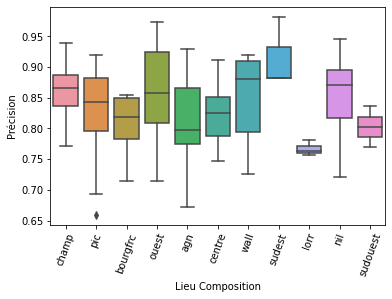

In [155]:
##boxplot
plt.xticks(rotation=70)

sns.boxplot(x = 'lieuCompositionType', y = 'accuracy', data = dfFull) 

plt.xlabel('Lieu Composition')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/boxplots/tidyLex/LemmaAccLieuCompoBP.png', dpi=300, transparent=False,bbox_inches='tight')

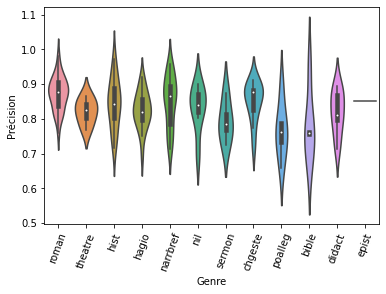

In [67]:
##violinplots
##pq donne au-dessus de 1 ?

plt.xticks(rotation=70)

sns.violinplot(x = 'genreType', y = 'accuracy', data = dfFull) 

plt.xlabel('Genre')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/violinplots/tidyLex/LemmaAccGenreVP.png', dpi=300, transparent=False,bbox_inches='tight')

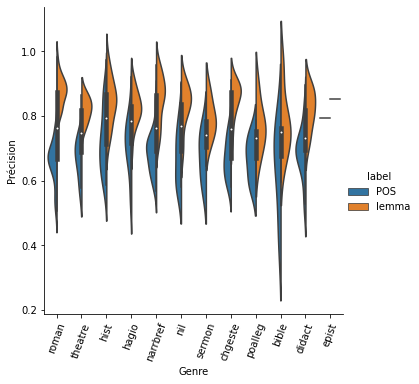

In [55]:
#violinPlot lemma et POS


sns.catplot(y="accuracy",x="genreType",

                hue="label",

                data=dfFull, kind="violin", split=True)

plt.xlabel('Genre')
plt.ylabel('Précision')
plt.xticks(rotation=70)

              #  height=8, aspect=.7)
plt.savefig('visualisationsv2/violinplots/tidyLex/POSLemmaAccGenreVP.png', dpi=300, transparent=False,bbox_inches='tight')    

/home/lucence/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/lucence/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



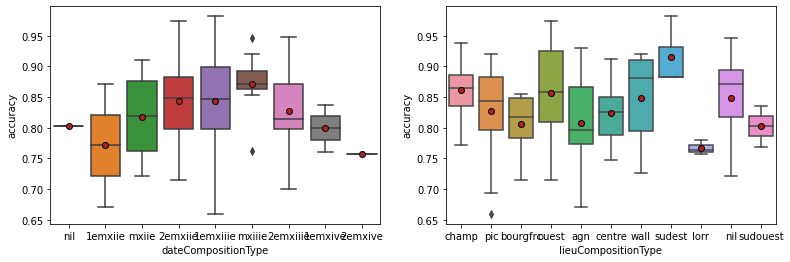

In [72]:
##boxplot date et scripta
plt.figure(figsize=(13,4)) 
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} 
sns.boxplot('dateCompositionType','accuracy',data=dfFull, showmeans=True, meanprops=meanprops) 
plt.subplot(1,2,2) 
sns.boxplot('lieuCompositionType','accuracy',data=dfFull, showmeans=True, meanprops=meanprops) 
plt.show()